In [2]:
import pandas as pd
d=pd.read_csv('/content/breast_cancer_survival.csv')
d=d.dropna()
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [3]:
d['Gender']=d['Gender'].replace({'MALE':1,'FEMALE':0})
d['ER status']=d['ER status'].replace({'Positive':1,'Negative':0})
d['PR status']=d['PR status'].replace({'Positive':1,'Negative':0})
d['HER2 status']=d['HER2 status'].replace({'Positive':1,'Negative':0})
d['Tumour_Stage']=d['Tumour_Stage'].replace({'I':1,'II':2,'III':3,'IV':4})
d['Histology']=d['Histology'].replace({'Infiltrating Ductal Carcinoma':1,'Infiltrating Lobular Carcinoma':0,'Mucinous Carcinoma':0.5})
d['Surgery_type']=d['Surgery_type'].replace({'Simple Mastectomy':1,'Lumpectomy':0,'Modified Radical Mastectomy':2,'Other':3})
print(d)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  \
0          1.0          1          1        

<ipython-input-3-2f8b1791ba8c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['Gender']=d['Gender'].replace({'MALE':1,'FEMALE':0})
<ipython-input-3-2f8b1791ba8c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['ER status']=d['ER status'].replace({'Positive':1,'Negative':0})
<ipython-input-3-2f8b1791ba8c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, se

In [4]:
y=d['Patient_Status']
print(y)

0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 317, dtype: object


In [5]:
x=d.drop(['Patient_Status','Date_of_Last_Visit','Date_of_Surgery'],axis=1)
x.dropna()
print(x)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     Histology  ER status  PR status  HER2 status  Surgery_type  
0          1.0          1          1         

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_sizes = list(range(1, 21))

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=test_size)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy with test size {test_size}: {accuracy}")

accuracy with test size 1: 1.0
accuracy with test size 2: 0.5
accuracy with test size 3: 0.0
accuracy with test size 4: 0.5
accuracy with test size 5: 0.4
accuracy with test size 6: 0.6666666666666666
accuracy with test size 7: 0.7142857142857143
accuracy with test size 8: 0.75
accuracy with test size 9: 0.7777777777777778
accuracy with test size 10: 0.8
accuracy with test size 11: 0.7272727272727273
accuracy with test size 12: 0.75
accuracy with test size 13: 0.7692307692307693
accuracy with test size 14: 0.7857142857142857
accuracy with test size 15: 0.8
accuracy with test size 16: 0.8125
accuracy with test size 17: 0.8235294117647058
accuracy with test size 18: 0.8333333333333334
accuracy with test size 19: 0.8421052631578947
accuracy with test size 20: 0.85


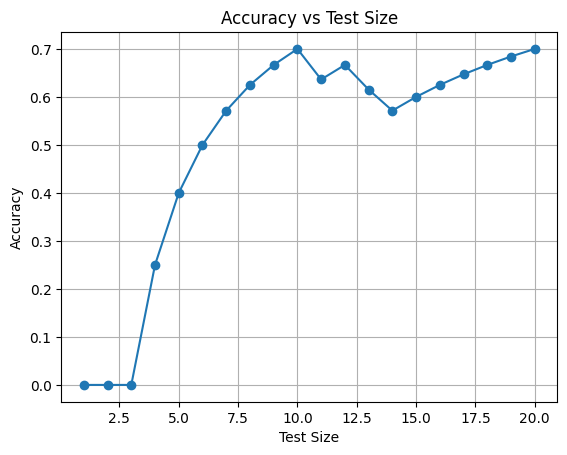

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
test_sizes = list(range( 1,21))
accuracies = []
for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.plot(test_sizes, accuracies, marker='o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
test_sizes = [20, 25, 30, 35]
accuracies = []
for test_size in test_sizes:
    train_size = 100 - test_size
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size / 100, random_state=42
    )
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with test size {test_size}%: {accuracy}")

Accuracy with test size 20%: 0.796875
Accuracy with test size 25%: 0.7875
Accuracy with test size 30%: 0.7916666666666666
Accuracy with test size 35%: 0.8108108108108109


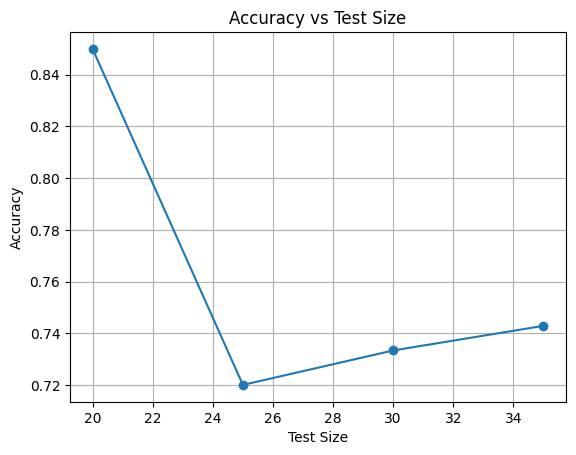

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
test_sizes = [20, 25, 30, 35]
accuracies = []
for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    svc = SVC(kernel='linear')
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.plot(test_sizes, accuracies, marker='o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size')
plt.grid(True)
plt.show()